In [2]:
import pandas as pd
import os
os.chdir("C:\\KDD project") #settig up the directory
shark = pd.read_excel("KDD.xlsx")
shark.head()
shark.info()
region_mapping = pd.read_csv('https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 24 columns):
Case Number               8739 non-null object
Date                      6451 non-null object
Year                      6449 non-null float64
Type                      6447 non-null object
Country                   6401 non-null object
Area                      5988 non-null object
Location                  5904 non-null object
Activity                  5901 non-null object
Name                      6241 non-null object
Sex                       5886 non-null object
Age                       3586 non-null object
Injury                    6423 non-null object
Fatal (Y/N)               5905 non-null object
Time                      3064 non-null object
Species                   3545 non-null object
Investigator or Source    6434 non-null object
pdf                       6451 non-null object
href formula              6449 non-null object
href                      6451 non-null obje

In [3]:
# shark.head()
shark.tail() # print the last 10 lines of dataset
shark.columns # print  the column names

# all bottom columns are NAN
# need to correct our column name, extra spaces are there

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [4]:
shark.shape # print  the number of rows and columns

(25760, 24)

In [5]:
shark.columns = shark.columns.str.rstrip() # delete the spaces from the column names

In [6]:
shark.columns  

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [7]:
shark.isnull().sum() #to check the NULL values count

Case Number               17021
Date                      19309
Year                      19311
Type                      19313
Country                   19359
Area                      19772
Location                  19856
Activity                  19859
Name                      19519
Sex                       19874
Age                       22174
Injury                    19337
Fatal (Y/N)               19855
Time                      22696
Species                   22215
Investigator or Source    19326
pdf                       19309
href formula              19311
href                      19309
Case Number.1             19309
Case Number.2             19309
original order            19309
Unnamed: 22               25759
Unnamed: 23               25758
dtype: int64

In [8]:
shark.tail() # print last 10 records

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
25755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25759,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
shark = shark.dropna(subset=['Activity','Area','Country','Location']) 
'''This will drop all the records that have NULL values in the above four columns/variables'''

'This will drop all the records that have NULL values in the above four columns/variables'

In [10]:
shark.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2019.08.27,27-Aug-2019,2019.0,Provoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Donald Walsh,M,...,6.5' shark,"K. McMurray, TrackingSharks.com",2019.08.27-Walsh.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.27,2019.08.27,6452.0,NaN,NaN
1,2019.08.21,21-Aug-2019,2019.0,Unprovoked,USA,Florida,"Fort Lauderdale, Broward County",Wading,Christian Mariani,M,...,NaN,"K. McMurray, TrackingSharks.com",2019.08.21-Mariani.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.21,2019.08.21,6451.0,NaN,NaN
2,2019.08.20,20-Aug-2019,2019.0,Unprovoked,USA,Hawaii,"Napoopoo Park in Kealakekua Bay, The Big Island",Swimming,female,F,...,NaN,"Hawaii News Now, 8/20/2019",2019.08.20-Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.20,2019.08.20,6450.0,NaN,NaN
3,2019.08.16,16-Aug-2019,2019.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Wading,Maggie Crum,M,...,NaN,"WESH, 8/16/2019",2019.08.16-Crum.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.16,2019.08.16,6449.0,NaN,NaN
4,2019.08.11,11-Aug-2019,2019.0,Unprovoked,USA,Hawaii,"Makaha Beach, Oahu",Surfing,Max Keliikipi,M,...,10' to 12' shark,"M. Michaelson, GSAF",2019.08.11-Keliikipi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.11,2019.08.11,6448.0,NaN,NaN


In [11]:
shark.tail()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
6443,ND.0006,Before 1906,0.0,Unprovoked,AUSTRALIA,New South Wales,,Swimming,Arab boy,M,...,Said to involve a grey nurse shark that leapt ...,"L. Becke in New York Sun, 9/9/1906; L. Schultz...",ND-0006-ArabBoy-Prymount.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0006,ND.0006,7.0,NaN,NaN
6444,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6446,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6448,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,...,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,2.0,NaN,NaN
6450,1836.08.19.R,Reported 19-Aug-1836,NaN,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,M,...,NaN,"C. Moore, GSAF",1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1836.08.19.R,1836.08.19.R,223.0,NaN,NaN


In [12]:
#data cleaning
#last twenty years
shark.info()
# shark.groupby("Activity").sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5243 entries, 0 to 6450
Data columns (total 24 columns):
Case Number               5242 non-null object
Date                      5243 non-null object
Year                      5242 non-null float64
Type                      5241 non-null object
Country                   5243 non-null object
Area                      5243 non-null object
Location                  5243 non-null object
Activity                  5243 non-null object
Name                      5144 non-null object
Sex                       4903 non-null object
Age                       3249 non-null object
Injury                    5233 non-null object
Fatal (Y/N)               4877 non-null object
Time                      2885 non-null object
Species                   3085 non-null object
Investigator or Source    5231 non-null object
pdf                       5243 non-null object
href formula              5242 non-null object
href                      5243 non-null object

In [13]:
shark.isnull().sum()

Case Number                  1
Date                         0
Year                         1
Type                         2
Country                      0
Area                         0
Location                     0
Activity                     0
Name                        99
Sex                        340
Age                       1994
Injury                      10
Fatal (Y/N)                366
Time                      2358
Species                   2158
Investigator or Source      12
pdf                          0
href formula                 1
href                         0
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               5242
Unnamed: 23               5241
dtype: int64

In [14]:
import numpy as np
'''This will filter the data for 20 years and store it in a new variable for dataframe'''
final_data = shark[np.logical_and(shark["Year"]>1999, shark["Year"]<2020)]  
# final_data.isna().sum()
# final_data.info()

# to get us data
us_data = final_data[final_data.Country == 'USA']
final_data=us_data

# final_data.Country.astype.String

# data = final_data[final_data['Country'].str.contains('USA')]
# print(data)
# final_data[Year]

In [15]:

new_us_data = pd.merge(us_data, region_mapping, left_on='Area', right_on='State')
new_us_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 28 columns):
Case Number               1023 non-null object
Date                      1023 non-null object
Year                      1023 non-null float64
Type                      1023 non-null object
Country                   1023 non-null object
Area                      1023 non-null object
Location                  1023 non-null object
Activity                  1023 non-null object
Name                      1017 non-null object
Sex                       1000 non-null object
Age                       835 non-null object
Injury                    1023 non-null object
Fatal (Y/N)               970 non-null object
Time                      862 non-null object
Species                   646 non-null object
Investigator or Source    1022 non-null object
pdf                       1023 non-null object
href formula              1023 non-null object
href                      1023 non-null object
Cas

In [16]:
print(new_us_data.groupby('Activity').size().sort_values(ascending=False))
#dropping all the activity which is not given. We can discuss on this
new_us_data = new_us_data.dropna(subset=['Activity'])
new_us_data.info()

Activity
Surfing                                           393
Swimming                                          154
Wading                                             65
Fishing                                            37
Standing                                           32
                                                 ... 
Surf paddling                                       1
Surf-skiing                                         1
Surfing / Wading                                    1
Surfing, but standing in water alongside board      1
Attempting to illegally enter the USA               1
Length: 151, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 28 columns):
Case Number               1023 non-null object
Date                      1023 non-null object
Year                      1023 non-null float64
Type                      1023 non-null object
Country                   1023 non-null object
Area                      10

In [50]:
# final_data["new_Activity"] = final_data['Activity'].str.contains('swimming', regex=False)

# activity_series = final_data['Activity']
# activity_series
# activity_series[activity_series.str.contains('swimming', regex=False)]

import re
import numpy as np
# final_data.loc[final_data.Activity.str.contains('fishing',case=False, regex=True), 'Activity'] = 'xyz'

fishing = 'fishing'
surfing = 'surfing'
swimming = 'swimming'
wading = 'wading'
others = 'others'
def replace_activity(x):
    
    if fishing in x:
        return "Fishing"
    elif surfing in x:
        return "Surfing"
    elif swimming in x:
        return "Swimming"
    elif wading in x:
        return "Wading"
    else:
        return "Others"

In [51]:
new_us_data['Activity_NewCol'] = new_us_data.apply(lambda x: replace_activity(x['Activity'].lower()), axis=1)

In [52]:
new_us_data.groupby('Activity_NewCol').size().sort_values(ascending=False)

Activity_NewCol
Surfing     430
Others      247
Swimming    175
Fishing     103
Wading       68
dtype: int64

Activity_NewCol
Fishing     103
Others      247
Surfing     430
Swimming    175
Wading       68
dtype: int64


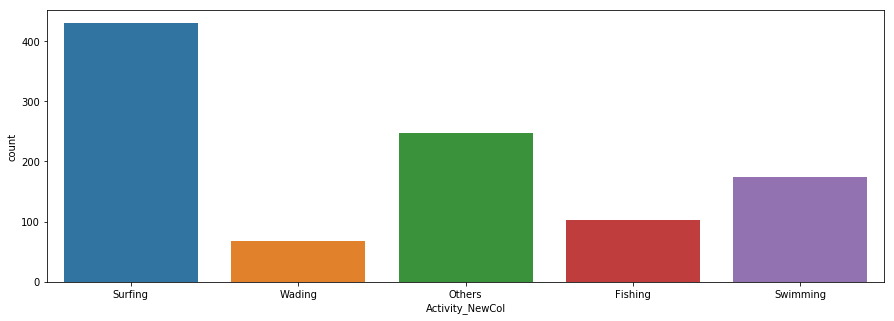

In [53]:
###### Write your code here
import seaborn as sns
import matplotlib.pyplot as plt
act=print(new_us_data.groupby("Activity_NewCol").size())
plt.figure(figsize=(15,5))
sns.countplot(x="Activity_NewCol",data=new_us_data)
plt.show()

In [54]:
dt=new_us_data[new_us_data.Region == 'South']
dt=(dt[dt.Activity_NewCol== 'Surfing'])
Surfing=[]
Surfing.append(dt.Activity_NewCol.count())

In [55]:
dt=new_us_data[new_us_data.Region == 'West']
dt=(dt[dt.Activity_NewCol== 'Surfing'])
Surfing.append(dt.Activity_NewCol.count())

In [56]:
dt=new_us_data[new_us_data.Region == 'Northeast']
dt=(dt[dt.Activity_NewCol== 'Surfing'])
Surfing.append(dt.Activity_NewCol.count())

In [57]:
Surfing

[302, 123, 5]

In [58]:
dt=new_us_data[new_us_data.Region == 'South']
dt=(dt[dt.Activity_NewCol== 'Others'])
Others=[]
Others.append(dt.Activity_NewCol.count())

In [59]:
dt=new_us_data[new_us_data.Region == 'West']
dt=(dt[dt.Activity_NewCol== 'Others'])
Others.append(dt.Activity_NewCol.count())

In [60]:
dt=new_us_data[new_us_data.Region == 'Northeast']
dt=(dt[dt.Activity_NewCol== 'Others'])
Others.append(dt.Activity_NewCol.count())

In [61]:
Others

[155, 84, 8]

In [62]:
dt=new_us_data[new_us_data.Region == 'South']
dt=(dt[dt.Activity_NewCol== 'Swimming'])
Swimming=[]
Swimming.append(dt.Activity_NewCol.count())

In [63]:
dt=new_us_data[new_us_data.Region == 'West']
dt=(dt[dt.Activity_NewCol== 'Swimming'])
Swimming.append(dt.Activity_NewCol.count())

In [64]:
dt=new_us_data[new_us_data.Region == 'Northeast']
dt=(dt[dt.Activity_NewCol== 'Swimming'])
Swimming.append(dt.Activity_NewCol.count())

In [65]:
Swimming

[141, 33, 1]

In [66]:
dt=new_us_data[new_us_data.Region == 'South']
dt=(dt[dt.Activity_NewCol== 'Fishing'])
Fishing=[]
Fishing.append(dt.Activity_NewCol.count())

In [67]:
dt=new_us_data[new_us_data.Region == 'West']
dt=(dt[dt.Activity_NewCol== 'Fishing'])
Fishing.append(dt.Activity_NewCol.count())

In [68]:
dt=new_us_data[new_us_data.Region == 'Northeast']
dt=(dt[dt.Activity_NewCol== 'Fishing'])
Fishing.append(dt.Activity_NewCol.count())

In [69]:
Fishing

[66, 32, 5]

In [70]:
dt.head(20)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,State,State Code,Region,Division,Activity_NewCol
749,2011.07.25,25-Jul-2011,2011.0,Unprovoked,USA,New Jersey,"Egg Harbor, Atlantic County",Wade Fishing,Eric Aubrey,M,...,2011.07.25,2011.07.25,5420.0,NaN,NaN,New Jersey,NJ,Northeast,Middle Atlantic,Fishing
888,2017.08.03,03-Aug-2017,2017.0,Provoked,USA,Massachusetts,"Menauhant Beach, Falmouth,\nBarnstable County",Fishing,male,M,...,2017.08.03,2017.08.03,6211.0,NaN,NaN,Massachusetts,MA,Northeast,New England,Fishing
889,2016.07.07.b,07-Jul-2016,2016.0,Provoked,USA,Massachusetts,"Off Gloucester, Essec County",Fishing,Roger Brissom,M,...,2016.07.07.b,2016.07.07.b,6062.0,NaN,NaN,Massachusetts,MA,Northeast,New England,Fishing
892,2001.07.21,21-Jul-2001,2001.0,Watercraft,USA,Massachusetts,Chatham Island,Fishing,"boat, occupants: Joseph Fitzback & 6 passengers",NaN,...,2001.07.21,2001.07.21,4379.0,NaN,NaN,Massachusetts,MA,Northeast,New England,Fishing
929,2010.07.03,03-Jul-2010,2010.0,Provoked,USA,New York,Off Long Island,Fishing,Frank Joseph,M,...,2010.07.03,2010.07.03,5297.0,NaN,NaN,New York,NY,Northeast,Middle Atlantic,Fishing


In [71]:
dt=new_us_data[new_us_data.Region == 'South']
dt=(dt[dt.Activity_NewCol== 'Wading'])
Wading=[]
Wading.append(dt.Activity_NewCol.count())

In [72]:
dt=new_us_data[new_us_data.Region == 'West']
dt=(dt[dt.Activity_NewCol== 'Wading'])
Wading.append(dt.Activity_NewCol.count())

In [73]:
dt=new_us_data[new_us_data.Region == 'Northeast']
dt=(dt[dt.Activity_NewCol== 'Wading'])
Wading.append(dt.Activity_NewCol.count())

In [74]:
Wading

[65, 2, 1]

In [75]:
print(Surfing)
print(Swimming)
print(Wading)
print(Fishing)
print(Others)

[302, 123, 5]
[141, 33, 1]
[65, 2, 1]
[66, 32, 5]
[155, 84, 8]


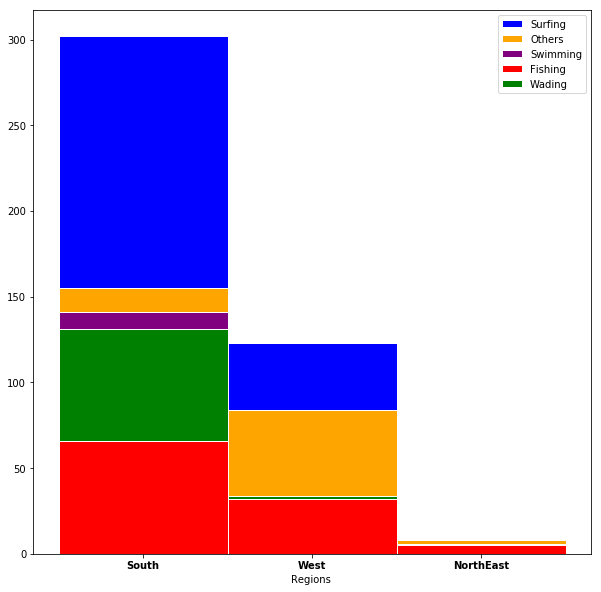

In [76]:
plt.figure(figsize=(10,10))
r = [0,1,2]
names = ['South','West','NorthEast']
barWidth = 1

plt.bar(r, Surfing, color='blue', edgecolor='white', label="Surfing",width=barWidth)
plt.bar(r, Others, color='orange', edgecolor='white',width=barWidth,label="Others")
plt.bar(r, Swimming, color='purple', edgecolor='white',width=barWidth,label="Swimming") 

plt.bar(r, Fishing, color='red', edgecolor='white',width=barWidth,label="Fishing")

plt.bar(r, Wading, color='green', edgecolor='white',width=barWidth,label="Wading",bottom=Fishing)

plt.xticks(r, names, fontweight='bold')
plt.xlabel("Regions ")
plt.legend()
plt.show()

In [77]:
new_us_data.groupby("Region").size()

Region
Northeast     20
South        729
West         274
dtype: int64

In [78]:
new_us_data.groupby("Division").size()

Division
East South Central      9
Middle Atlantic        10
Mountain                1
New England            10
Pacific               273
South Atlantic        684
West South Central     36
dtype: int64

Region
Northeast     20
South        729
West         274
dtype: int64


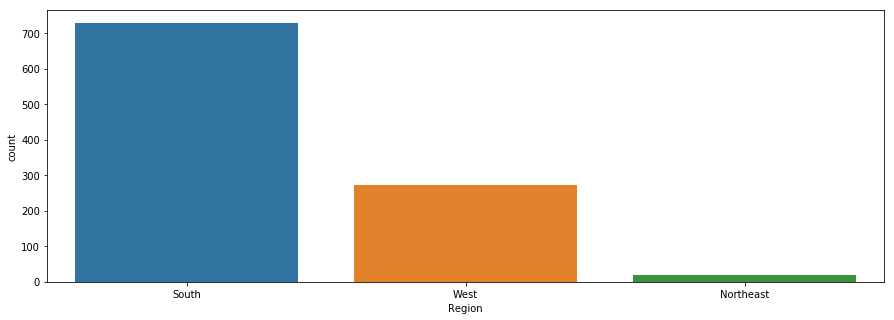

In [79]:
###### Write your code here
import seaborn as sns
import matplotlib.pyplot as plt
print(new_us_data.groupby("Region").size())
plt.figure(figsize=(15,5))
sns.countplot(x="Region",data=new_us_data)


Division
East South Central      9
Middle Atlantic        10
Mountain                1
New England            10
Pacific               273
South Atlantic        684
West South Central     36
dtype: int64


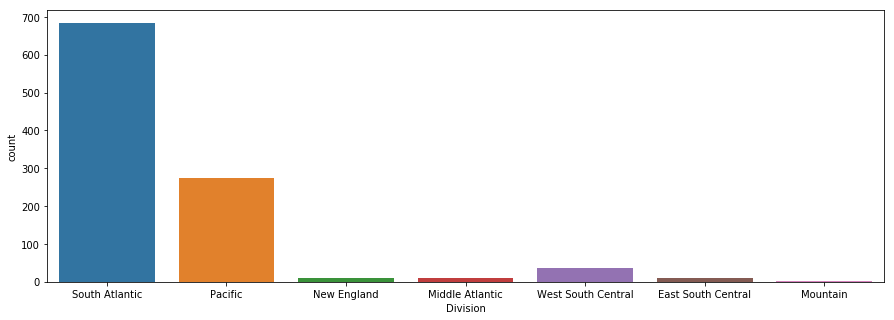

In [80]:
###### Write your code here
import seaborn as sns
import matplotlib.pyplot as plt
print(new_us_data.groupby("Division").size())
plt.figure(figsize=(15,5))
sns.countplot(x="Division",data=new_us_data)
